In [1]:
# import Class
from classy import Class
import numpy as np
# to get plots displayed in notebook
%matplotlib notebook
import matplotlib.pyplot as plt
from math import pi

In [2]:
model = Class()
model.struct_cleanup()

In [3]:
model.set({'omega_cdm':0.1205, "omega_b":0.02218, "h":0.67, "tau_reio":0.07})
model.set({"tau_reio":0.07,"ln10^{10}A_s":3.056,"n_s":0.9619})
model.set({"tight_coupling_trigger_tau_c_over_tau_h":0.0, "tight_coupling_trigger_tau_c_over_tau_k":0.0})
model.set({"output":"tCl, lCl, pCl, mPk", "root":"test_output/lcdm_","recombination":"recfast", "gauge":"synchronous"})
model.set({"root": "test_output/lcdm_","write thermodynamics":"yes", "write background":"yes", "lensing":"yes"})
model.set({"k_per_decade_for_pk":100, "P_k_max_h/Mpc":5})
model.compute()

In [17]:
from classy import Class
neut = Class()
neut.struct_cleanup()

In [18]:
neut.set({'omega_cdm':0.1205, "omega_b":0.02218, "h":0.67, "tau_reio":0.07})
neut.set({"tau_reio":0.07,"ln10^{10}A_s":3.056,"n_s":0.9619})
neut.set({"tight_coupling_trigger_tau_c_over_tau_h":0.0, "tight_coupling_trigger_tau_c_over_tau_k":0.0})
neut.set({"output":"tCl, lCl, pCl, mPk", "root":"test_output/neut_","recombination":"recfast", "gauge":"synchronous"})
neut.set({"root": "test_output/lcdm_","write thermodynamics":"yes", "write background":"yes", "lensing":"yes"})
neut.set({"k_per_decade_for_pk":100, "P_k_max_h/Mpc":5})
neut.set({"N_ncdm":3, "m_ncdm":"0.10, 0.10, 0.10", "T_ncdm":"0.715985,0.715985,0.715985"})
neut.compute()

In [32]:
# plot these values
# get all C_l output
cls = model.raw_cl(3000)
ll = cls['ell'][2:]
clTT = cls['tt'][2:]
clEE = cls['ee'][2:]
clPP = cls['pp'][2:]

cls1 = neut.raw_cl(3000)
ll1= cls1['ell'][2:]
clTT1 = cls1['tt'][2:]
clEE1 = cls1['ee'][2:]
clPP1 = cls1['pp'][2:]

In [33]:
# to get plots displayed in notebook
%matplotlib notebook
import matplotlib.pyplot as plt
from math import pi

<IPython.core.display.Javascript object>


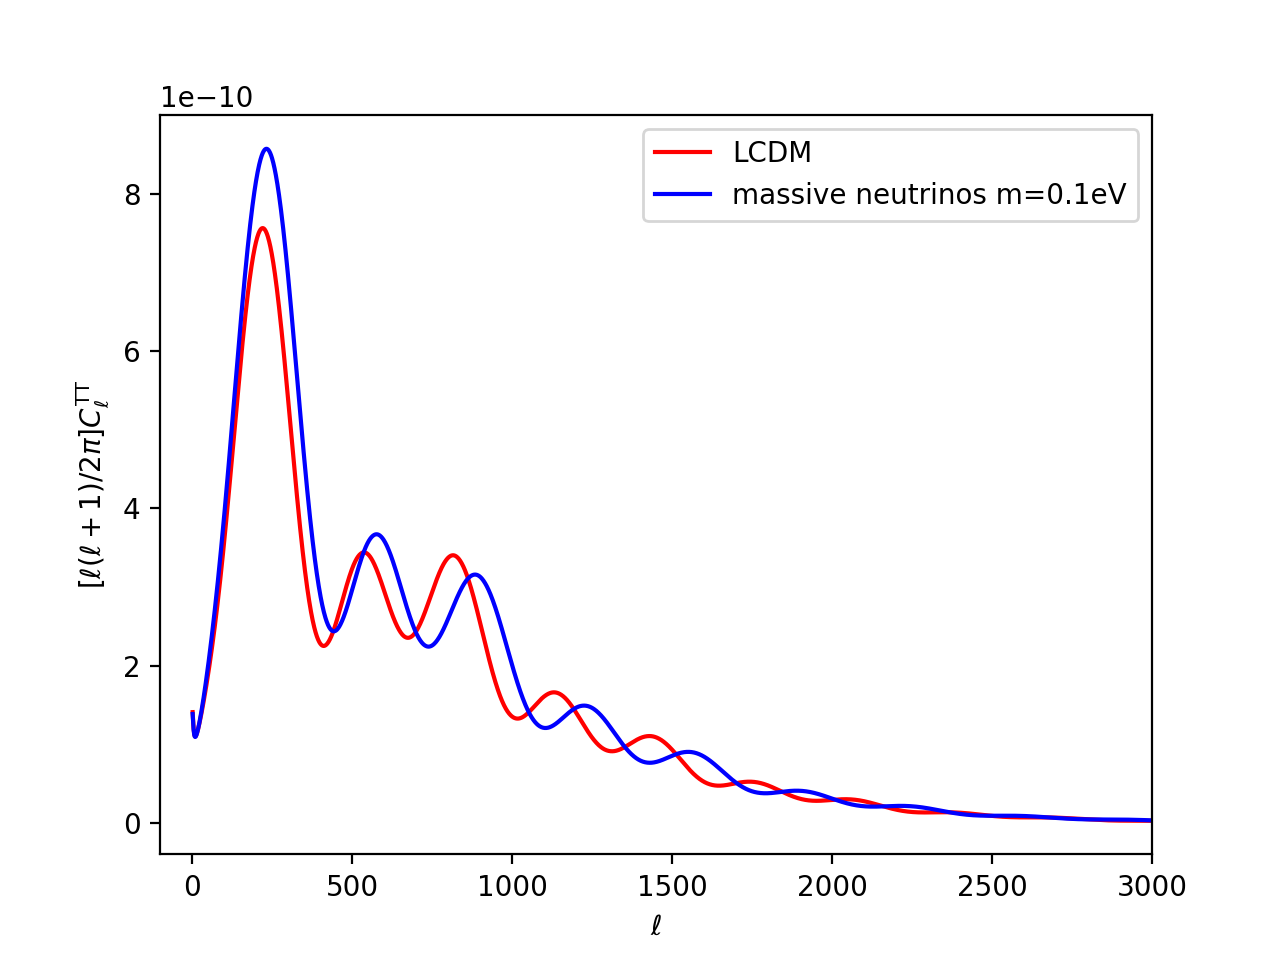

In [34]:
# plot C_l^TT
plt.figure(1)
plt.xscale('linear');plt.yscale('linear');plt.xlim(-100,3000)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi,'r-',label = "LCDM")
plt.plot(ll1,clTT1*ll1*(ll1+1)/2./pi,'b-', label = "massive neutrinos m=0.1eV")
plt.legend(loc ="upper right")
plt.show()

<IPython.core.display.Javascript object>


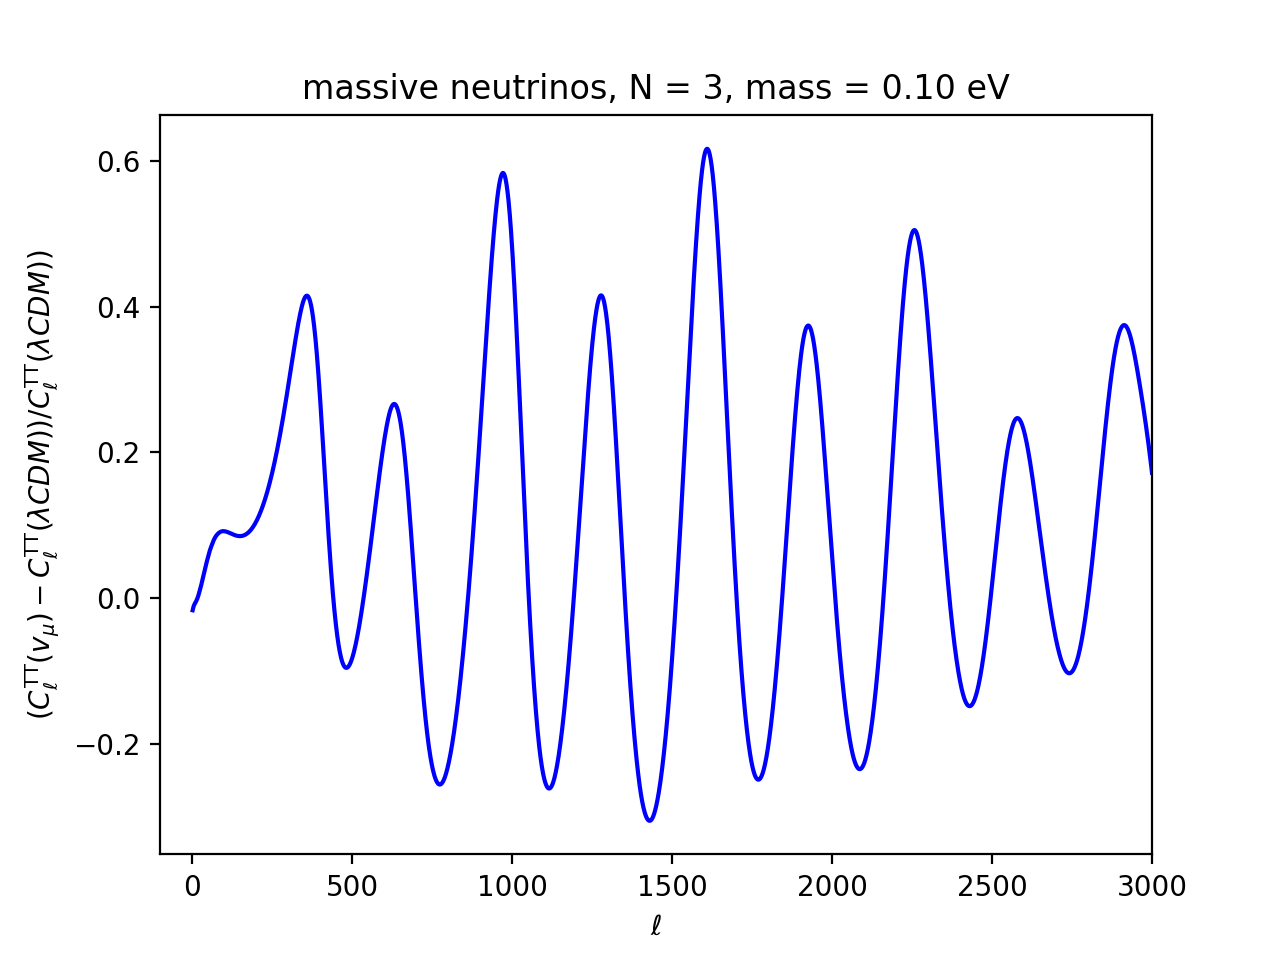

In [41]:
# plot C_l^TT
plt.figure(2)
plt.xscale('linear');plt.yscale('linear');plt.xlim(-100,3000)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$ (C_\ell^\mathrm{TT}(v_\mu) - C_\ell^\mathrm{TT}(\lambda CDM))/C_\ell^\mathrm{TT}(\lambda CDM))$')
#plt.plot(ll,clTT*ll*(ll+1)/2./pi,'r-',label = "")
plt.plot(ll1,(clTT1-clTT)/clTT,'b-')
plt.title("massive neutrinos, N = 3, mass = 0.10 eV")
plt.show()
plt.savefig("massive_neut_ClTT.pdf")

<IPython.core.display.Javascript object>


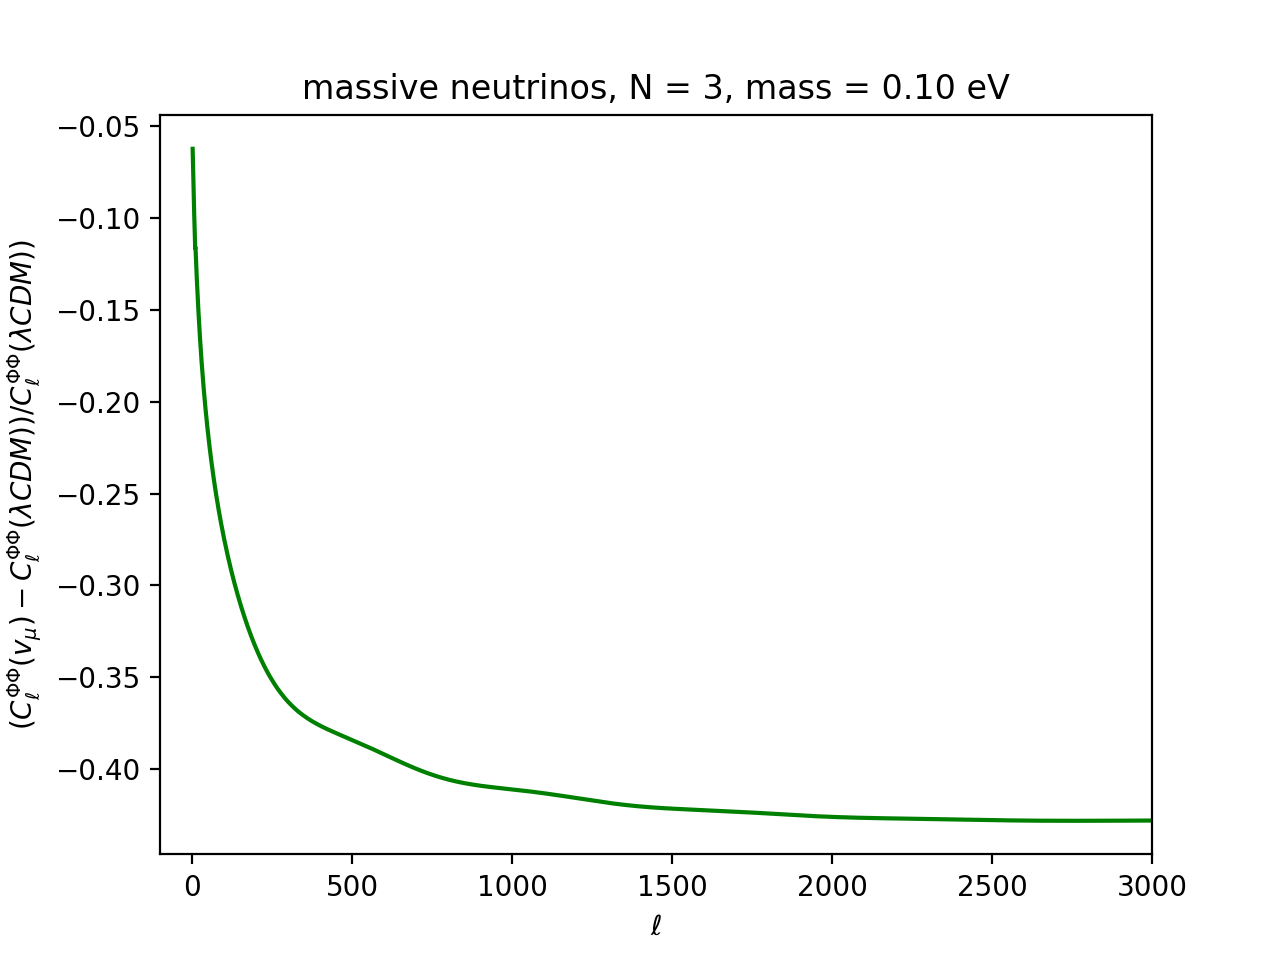

In [42]:
# plot C_l^PP (I could not find /kappa/kappa)
plt.figure(3)
plt.xscale('linear');plt.yscale('linear');plt.xlim(-100,3000)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$ (C_\ell^\mathrm{\Phi\Phi}(v_\mu) - C_\ell^\mathrm{\Phi\Phi}(\lambda CDM))/C_\ell^\mathrm{\Phi\Phi}(\lambda CDM))$')
#plt.plot(ll,clTT*ll*(ll+1)/2./pi,'r-',label = "")
plt.plot(ll1,(clPP1-clPP)/clPP,'g-')
plt.title("massive neutrinos, N = 3, mass = 0.10 eV")
plt.show()
plt.savefig("massive_neut_ClPP.pdf")

In [25]:
# get P(k) at redhsift z=0
import numpy as np
kk = np.logspace(-4,np.log10(3),1000)
Pk = []
for k in kk:
    Pk.append(model.pk(k,0.)) # function .pk(k,z)
Pk_neut = []
for k in kk:
    Pk_neut.append(neut.pk(k,0.)) #
Pk = np.array(Pk)
Pk_neut = np.array(Pk_neut)

<IPython.core.display.Javascript object>


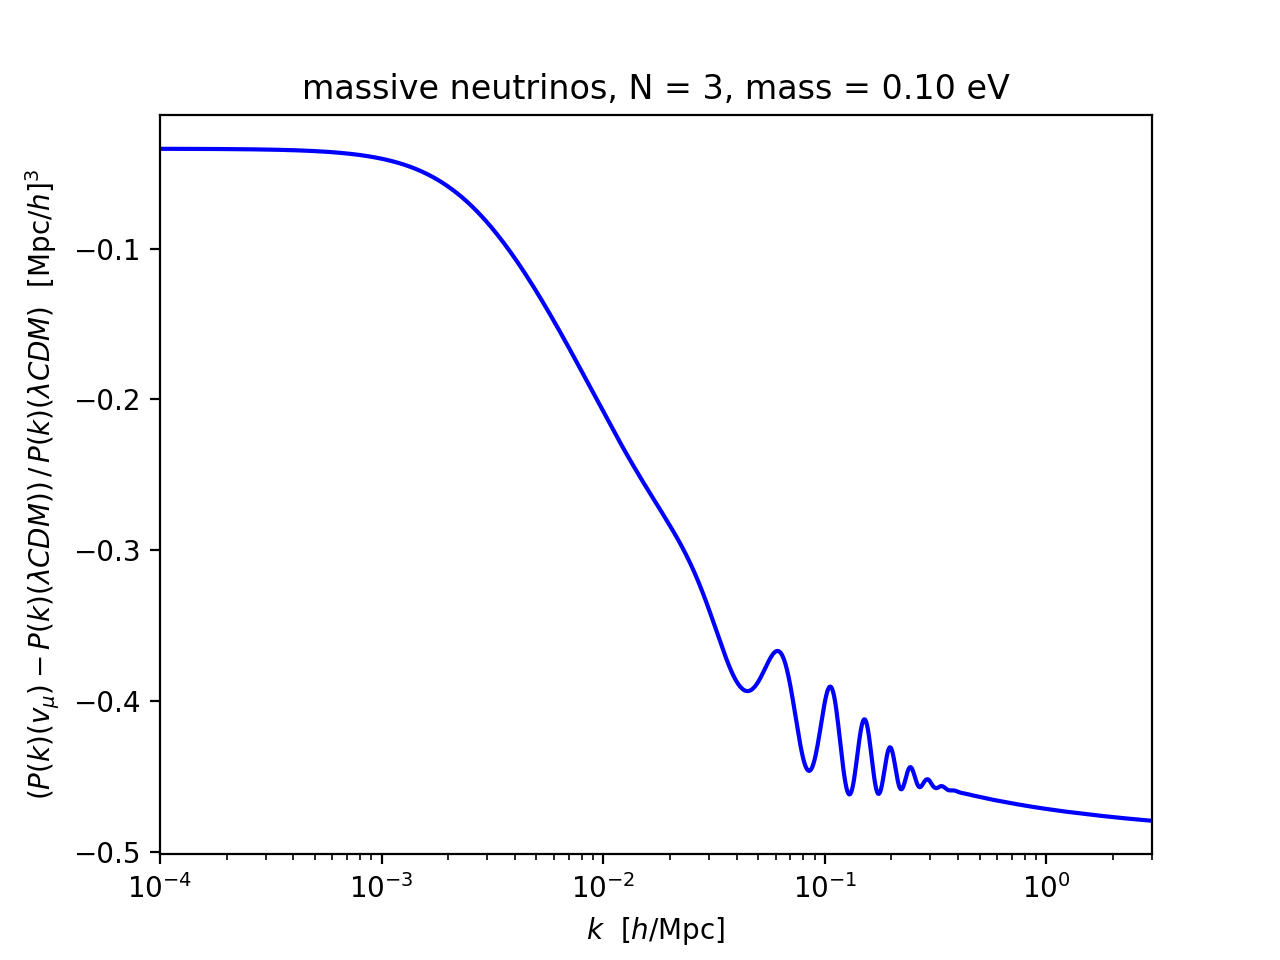

In [43]:
# plot P(k)
plt.figure(4)
plt.xscale('log');plt.yscale('linear');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$(P(k)(v_\mu) - P(k)(\lambda CDM))\,/\, P(k)(\lambda CDM)  \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,(Pk_neut - Pk)/Pk,'b-')
plt.title("massive neutrinos, N = 3, mass = 0.10 eV")
plt.show()
plt.savefig("massive_neut_Pk.pdf")